In [1]:
from sklearn.datasets import *

In [2]:
wine = load_wine()

print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
import pandas as pd

wine_df = pd.DataFrame(wine.data,columns=wine.feature_names)
wine_df['Y'] = pd.DataFrame(wine.target)
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


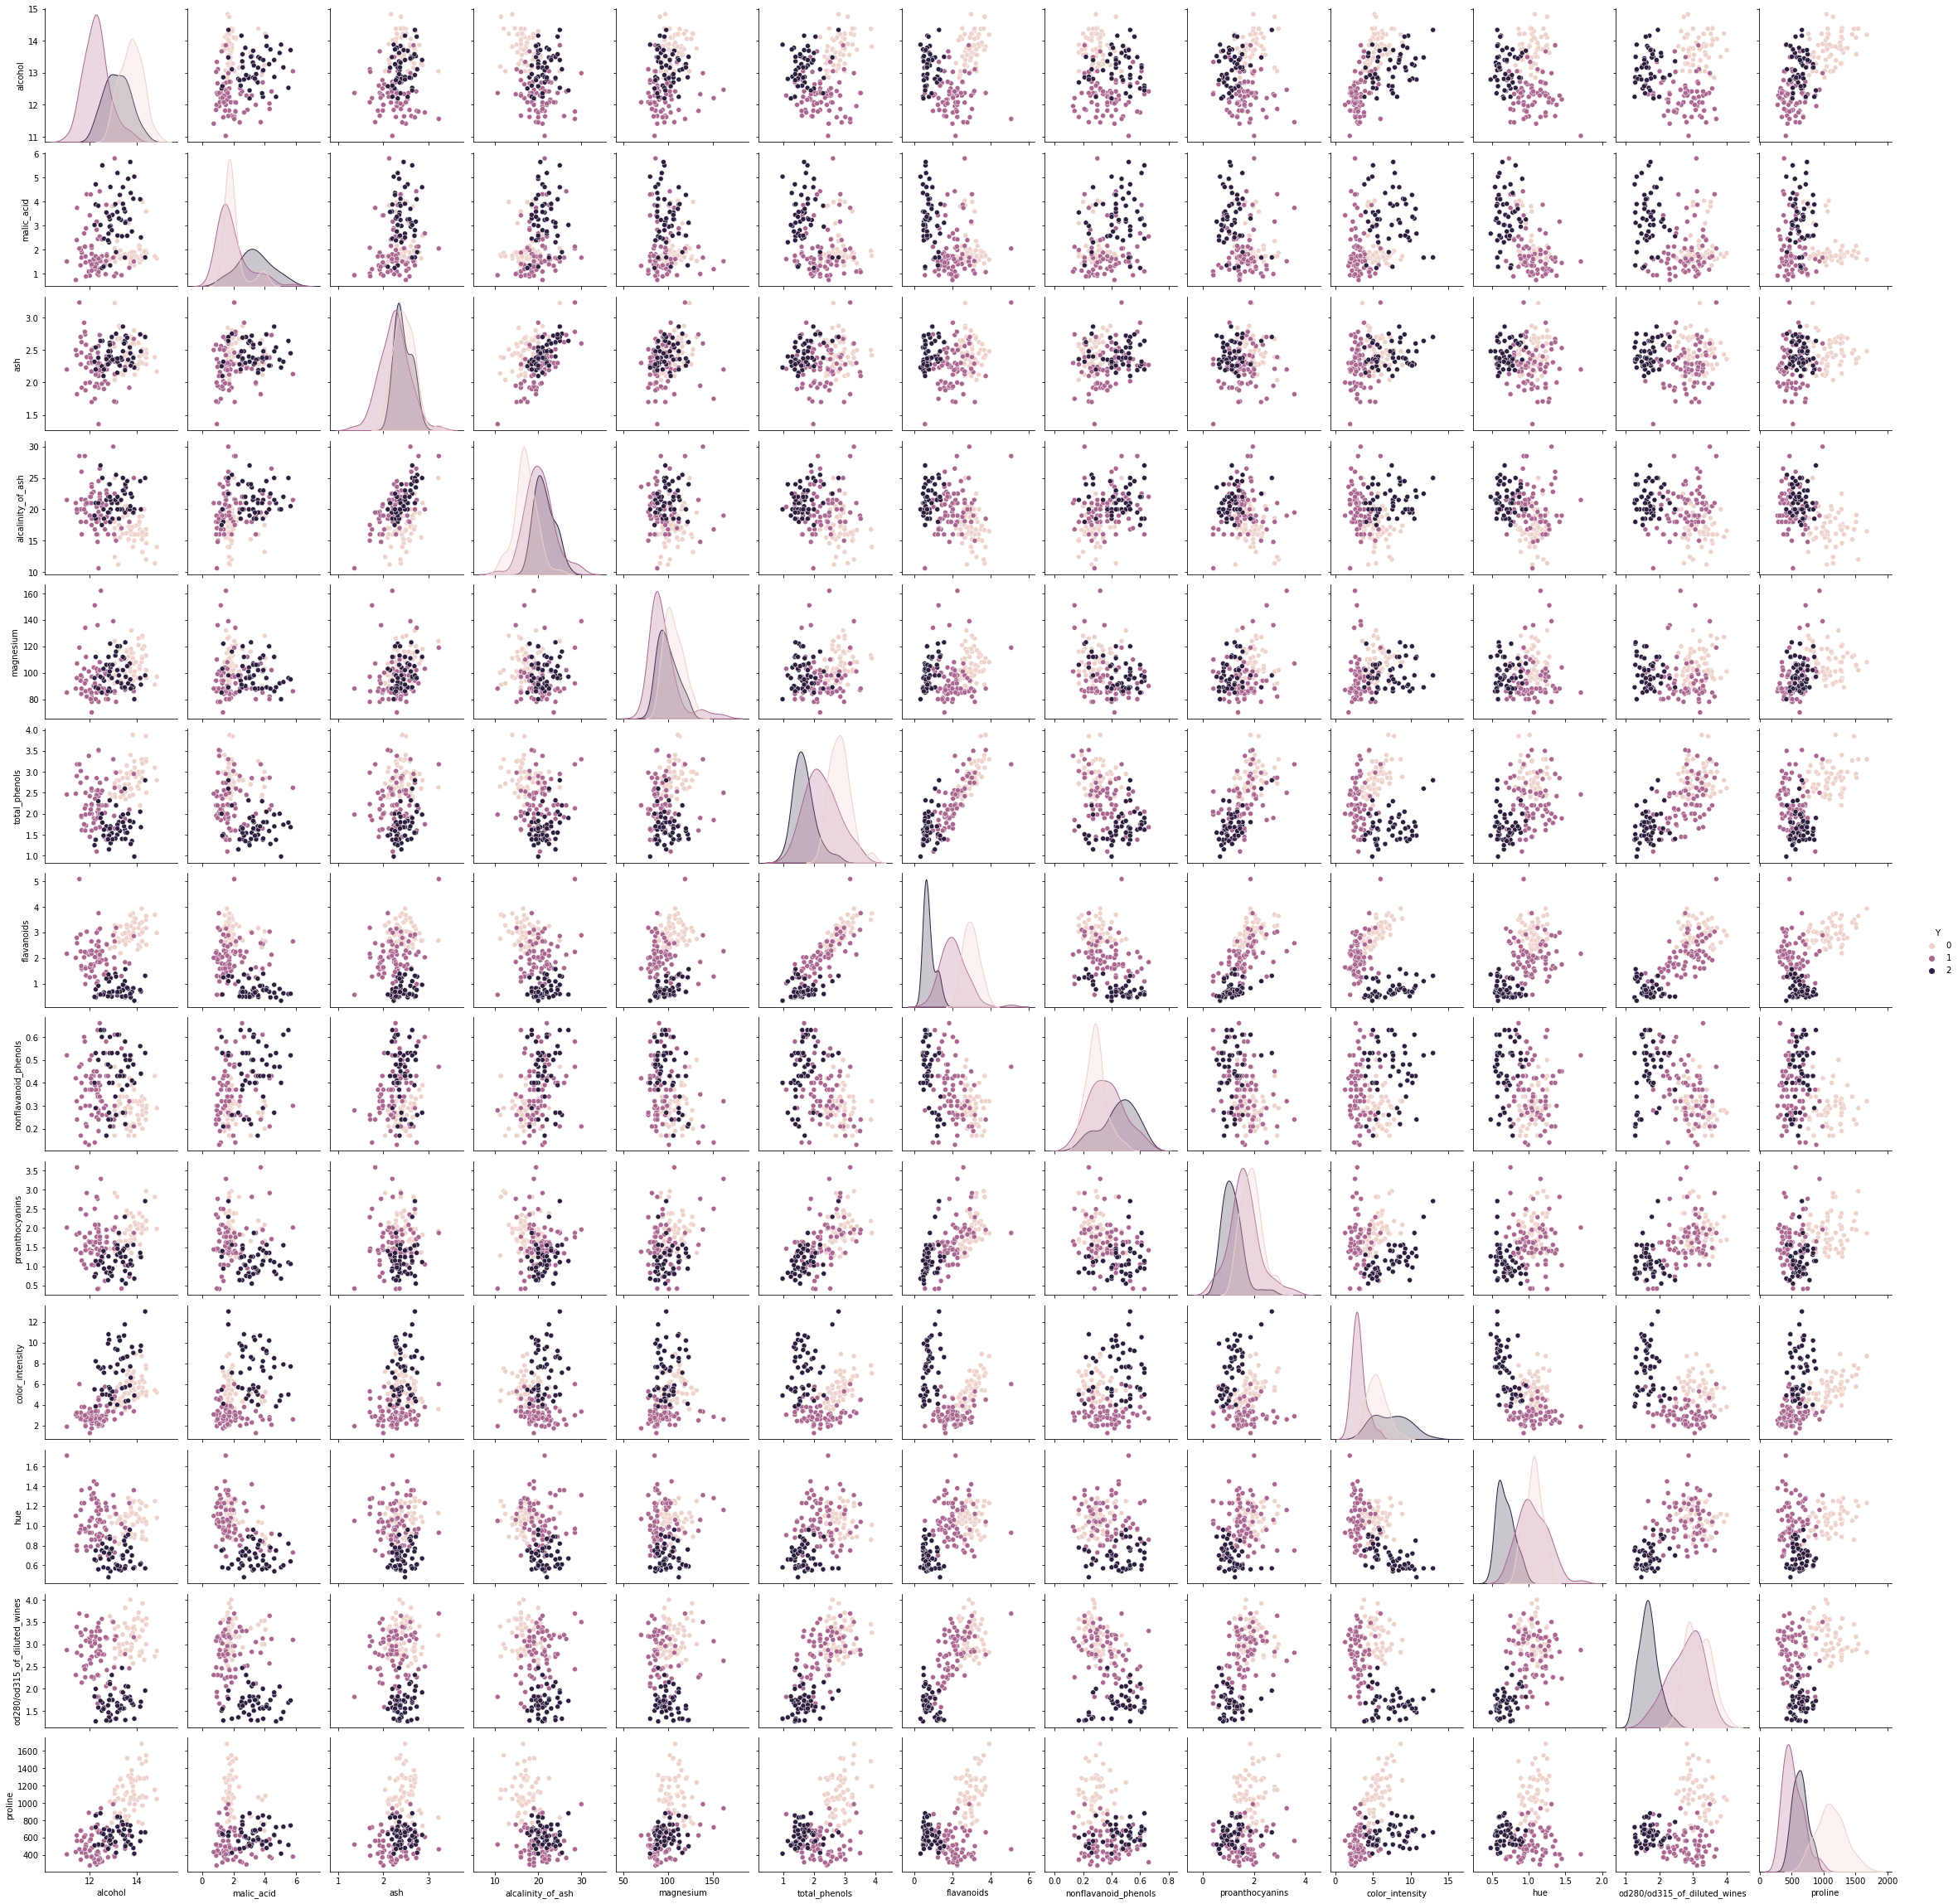

In [4]:
import seaborn as sns
sns.pairplot(wine_df,hue="Y")

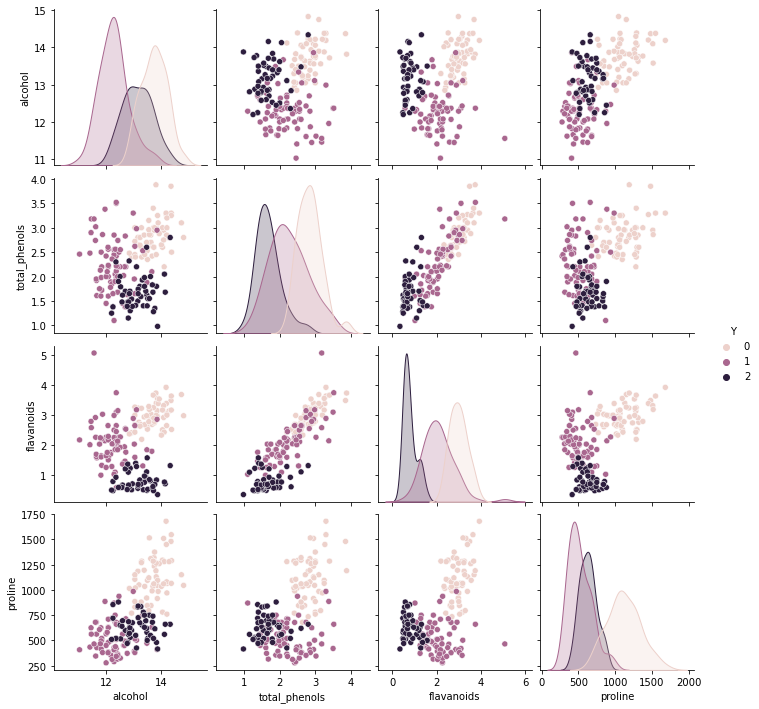

In [5]:
sns.pairplot(vars=['alcohol','total_phenols','flavanoids','proline'],data=wine_df,hue="Y")

In [6]:
# 피쳐 4개만 사용해서 분류기 만들어보기

X_data=wine_df[['alcohol','total_phenols','flavanoids','proline']].values
Y_data=wine_df['Y']

X_data

array([[1.423e+01, 2.800e+00, 3.060e+00, 1.065e+03],
       [1.320e+01, 2.650e+00, 2.760e+00, 1.050e+03],
       [1.316e+01, 2.800e+00, 3.240e+00, 1.185e+03],
       [1.437e+01, 3.850e+00, 3.490e+00, 1.480e+03],
       [1.324e+01, 2.800e+00, 2.690e+00, 7.350e+02],
       [1.420e+01, 3.270e+00, 3.390e+00, 1.450e+03],
       [1.439e+01, 2.500e+00, 2.520e+00, 1.290e+03],
       [1.406e+01, 2.600e+00, 2.510e+00, 1.295e+03],
       [1.483e+01, 2.800e+00, 2.980e+00, 1.045e+03],
       [1.386e+01, 2.980e+00, 3.150e+00, 1.045e+03],
       [1.410e+01, 2.950e+00, 3.320e+00, 1.510e+03],
       [1.412e+01, 2.200e+00, 2.430e+00, 1.280e+03],
       [1.375e+01, 2.600e+00, 2.760e+00, 1.320e+03],
       [1.475e+01, 3.100e+00, 3.690e+00, 1.150e+03],
       [1.438e+01, 3.300e+00, 3.640e+00, 1.547e+03],
       [1.363e+01, 2.850e+00, 2.910e+00, 1.310e+03],
       [1.430e+01, 2.800e+00, 3.140e+00, 1.280e+03],
       [1.383e+01, 2.950e+00, 3.400e+00, 1.130e+03],
       [1.419e+01, 3.300e+00, 3.930e+00, 1.680

In [7]:
from tensorflow.keras.utils import to_categorical

Y_data=to_categorical(Y_data)
Y_data

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [8]:
from sklearn.model_selection import train_test_split
t_x,tt_x,t_y,tt_y=train_test_split(X_data,Y_data,random_state=1)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

m=Sequential()
m.add(Dense(3, input_dim=4,activation='softmax'))
m.compile(optimizer='adam',loss='categorical_crossentropy'
          ,metrics=['accuracy'])
hy=m.fit(t_x,t_y,epochs=50,batch_size=1,validation_data=(tt_x,tt_y))

Epoch 1/50
133/133 [==============================] - 0s 2ms/step - loss: 88.3718 - accuracy: 0.1805 - val_loss: 54.3195 - val_accuracy: 0.1556
Epoch 2/50
133/133 [==============================] - 0s 841us/step - loss: 70.0390 - accuracy: 0.1729 - val_loss: 43.2064 - val_accuracy: 0.4000
Epoch 3/50
133/133 [==============================] - 0s 788us/step - loss: 52.7429 - accuracy: 0.1353 - val_loss: 31.2133 - val_accuracy: 0.1333
Epoch 4/50
133/133 [==============================] - 0s 705us/step - loss: 35.3833 - accuracy: 0.1128 - val_loss: 18.5308 - val_accuracy: 0.2444
Epoch 5/50
133/133 [==============================] - 0s 727us/step - loss: 17.9454 - accuracy: 0.1278 - val_loss: 6.5460 - val_accuracy: 0.4000
Epoch 6/50
133/133 [==============================] - 0s 712us/step - loss: 3.4847 - accuracy: 0.2105 - val_loss: 2.4417 - val_accuracy: 0.4000
Epoch 7/50
133/133 [==============================] - 0s 735us/step - loss: 1.9525 - accuracy: 0.2632 - val_loss: 1.4654 - val_ac

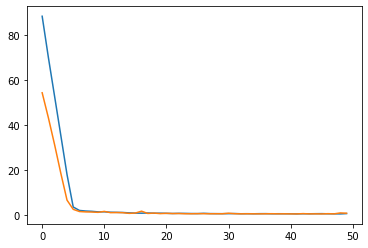

In [10]:
import matplotlib.pyplot as plt
plot_x=range(len(hy.history['accuracy']))
plt.plot(plot_x,hy.history['loss'])
plt.plot(plot_x,hy.history['val_loss'])